### IPL Team stats for all seasons

#### All imports

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

from geopy.geocoders import Nominatim
import folium

from wordcloud import WordCloud
from collections import Counter

import plotly.express as px
from plotly.subplots import make_subplots

import seaborn as sns

import circlify

### Short names used across the project

In [3]:
df = pd.read_csv("../data/points_table.csv")
short_names = {}

for row in df.iterrows():
    short_names.update({row[1]["name"]:row[1]["short_name"]})
short_names

{'Mumbai Indians': 'MI',
 'Delhi Capitals': 'DC',
 'Sunrisers Hyderabad': 'SRH',
 'Royal Challengers Bangalore': 'RCB',
 'Kolkata Knight Riders': 'KKR',
 'Kings XI Punjab': 'KXIP',
 'Chennai Super Kings': 'CSK',
 'Rajasthan Royals': 'RR',
 'Rising Pune Supergiant': 'RPS',
 'Gujarat Lions': 'GL',
 'Pune Warriors': 'PWI',
 'Deccan Chargers': 'SRH',
 'Kochi Tuskers Kerala': 'Kochi'}

### Team Logos

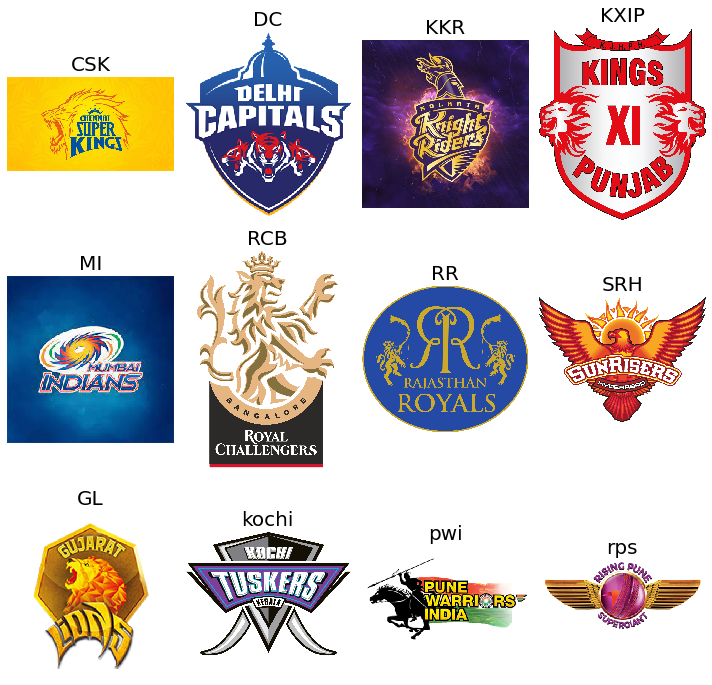

In [4]:
team_logos = {}
team_logos['CSK'] = "../team_logos/csk.jpg"
team_logos['DC'] = "../team_logos/dc.png"
team_logos['KKR'] = "../team_logos/kkr.jpg"
team_logos['KXIP'] = "../team_logos/kxip.png"
team_logos['MI'] = "../team_logos/mi.jpg"
team_logos['RCB'] = "../team_logos/rcb.png"
team_logos['RR'] = "../team_logos/rr.png"
team_logos['SRH'] = "../team_logos/srh.png"
team_logos['GL'] = "../team_logos/gl.png"
team_logos['kochi'] = "../team_logos/kochi.png"
team_logos['pwi'] = "../team_logos/pwi.png"
team_logos['rps'] = "../team_logos/rps.png"

fig = plt.figure(figsize=(5, 5))
fig.set_size_inches(10,10)

plt.subplots_adjust(wspace= 0, hspace= 0)
rows,columns,position = 3, 4, 1
for team in team_logos:
    ax = fig.add_subplot(rows,columns,position)
    image = plt.imread(team_logos[team])
    plt.imshow(image, interpolation='nearest')
#     fig.title(team, fontsize=20)
#     plt.title(team, size=(5, 5))
    ax.set_title(team, fontdict={'fontsize': 20, 'fontweight': 'medium'})
    plt.axis('off')
    position+=1


plt.tight_layout()

## Teams Position across seasons using the bump chart

In [5]:
teams_positions_df = pd.read_csv("../data/points_table.csv")
teams_positions_df['short_name'].unique()

array(['MI', 'DC', 'SRH', 'RCB', 'KKR', 'KXIP', 'CSK', 'RR', 'RPS', 'GL',
       'PWI', 'Kochi'], dtype=object)

Text(0, 0.5, 'Rank')

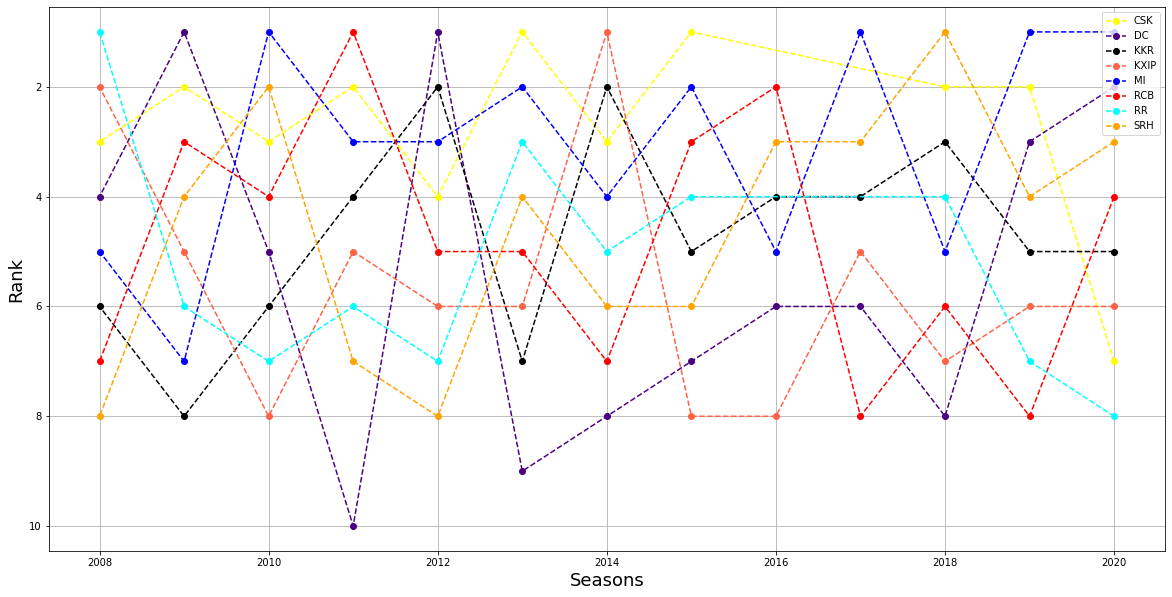

In [6]:
teams_positions_df = teams_positions_df.loc[~teams_positions_df['short_name'].isin(["Kochi", "PWI", "RPS", "GL"])]
plt.figure(figsize = (20, 10))
plt.grid()
color_map = {'CSK':'yellow', 'MI':'blue', 'KKR':'black', 'DC':'indigo', 'SRH':'orange', 'RCB':'red', 'RR':'cyan', 'KXIP':'tomato'}
for i, j in teams_positions_df.groupby("short_name"):
    plt.plot("season", "rank", "o--", data=j, color = color_map[i], label=i)
plt.legend(loc="upper right")
plt.gca().invert_yaxis()
plt.xlabel('Seasons', fontsize=18)
plt.ylabel('Rank', fontsize=18)

## Team position across seasons using heatmap

<AxesSubplot:xlabel='season', ylabel='short_name'>

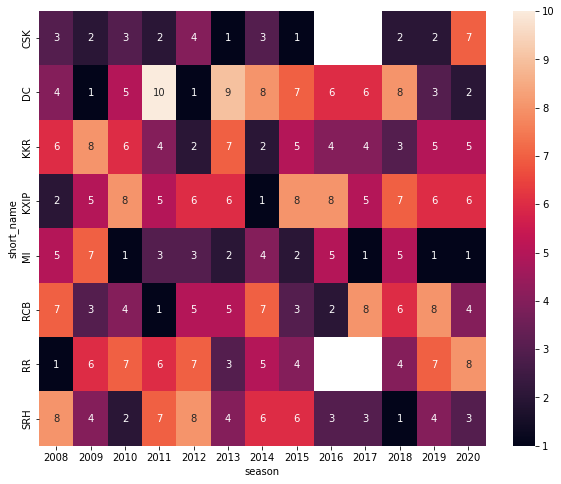

In [7]:
fig, ax = plt.subplots(figsize=(10,8))
points_table = pd.read_csv("../data/points_table.csv")
updated_points_table = points_table.loc[~points_table['short_name'].isin(["Kochi", "PWI", "RPS", "GL"])]
updated_points_table = updated_points_table.pivot("short_name", "season", "rank")
sns.heatmap(updated_points_table, annot=True, ax=ax)

### Lets visualize the teams with more wins using world cloud

In [8]:
matches_summary = pd.read_csv("../data/all_season_summary.csv")
matches_summary.groupby(['season'])
winners = matches_summary['winner'].tolist()

In [9]:
winners_count = Counter(winners)
winners_count

Counter({'CSK': 107,
         'DC': 86,
         'RCB': 91,
         'RR': 81,
         'MI': 120,
         'KXIP': 88,
         'KKR': 99,
         'SRH': 95,
         'No Result': 11,
         'RPS': 15,
         'GL': 13,
         'PWI': 12,
         'Kochi': 6})

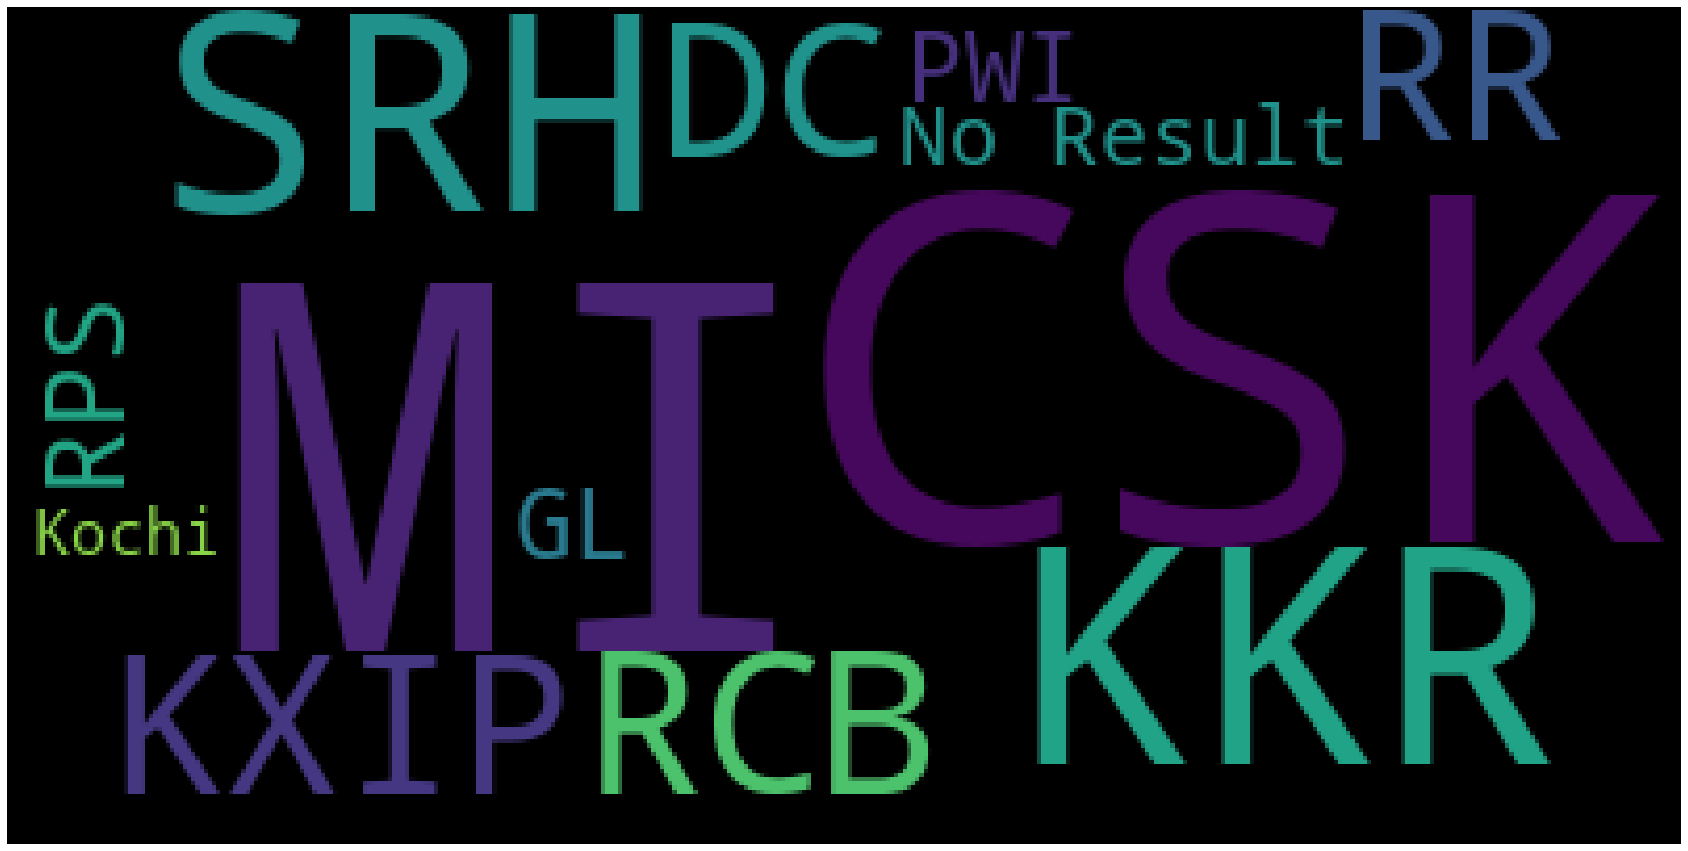

In [10]:
wordcloud = WordCloud().generate_from_frequencies(winners_count)

plt.figure(figsize = (30, 20))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### No of wins by each team in each season

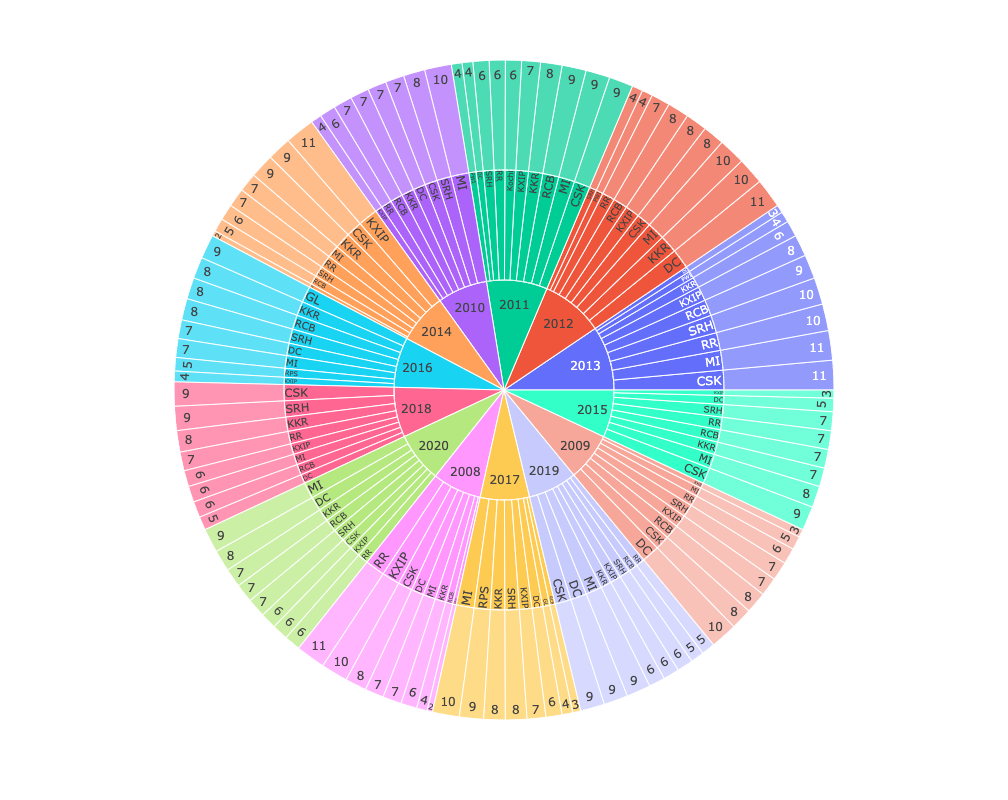

In [11]:
points_table_df = pd.read_csv("../data/points_table.csv")

fig = px.sunburst(points_table_df, path=['season', 'short_name', 'matcheswon'], values='matcheswon', height=800, width=800)
fig.show()

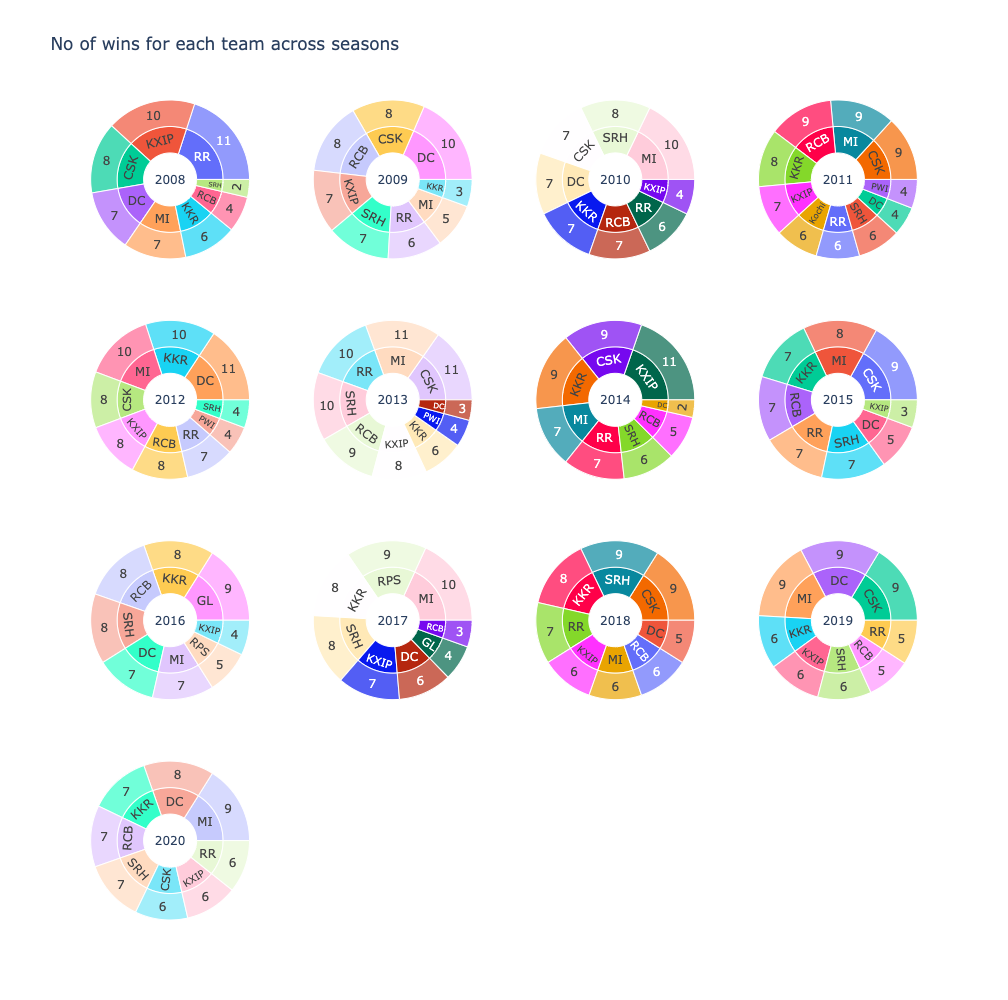

In [12]:
points_table_df = pd.read_csv("../data/points_table.csv")
season_matches = {}
for season, data in points_table_df.groupby('season'):
    season_matches[season] = data

rows = 4
columns = 4
plot = []
fig = make_subplots(rows=rows, cols=columns, specs=[[{"type": "sunburst"}]*4]*4)

for season in season_matches:
    plot.append(px.sunburst(season_matches[season], path=['season', 'short_name', 'matcheswon'], values='matcheswon', title=f"{season}"))

index = 0
for each_row in range(rows):
    for each_column in range(columns):
        if len(plot)>index:
            fig.add_trace(plot[index].data[0], row=each_row+1, col=each_column+1)
            index+=1
fig.update_layout(height=1000, width=1000, title_text="No of wins for each team across seasons")
fig.show()

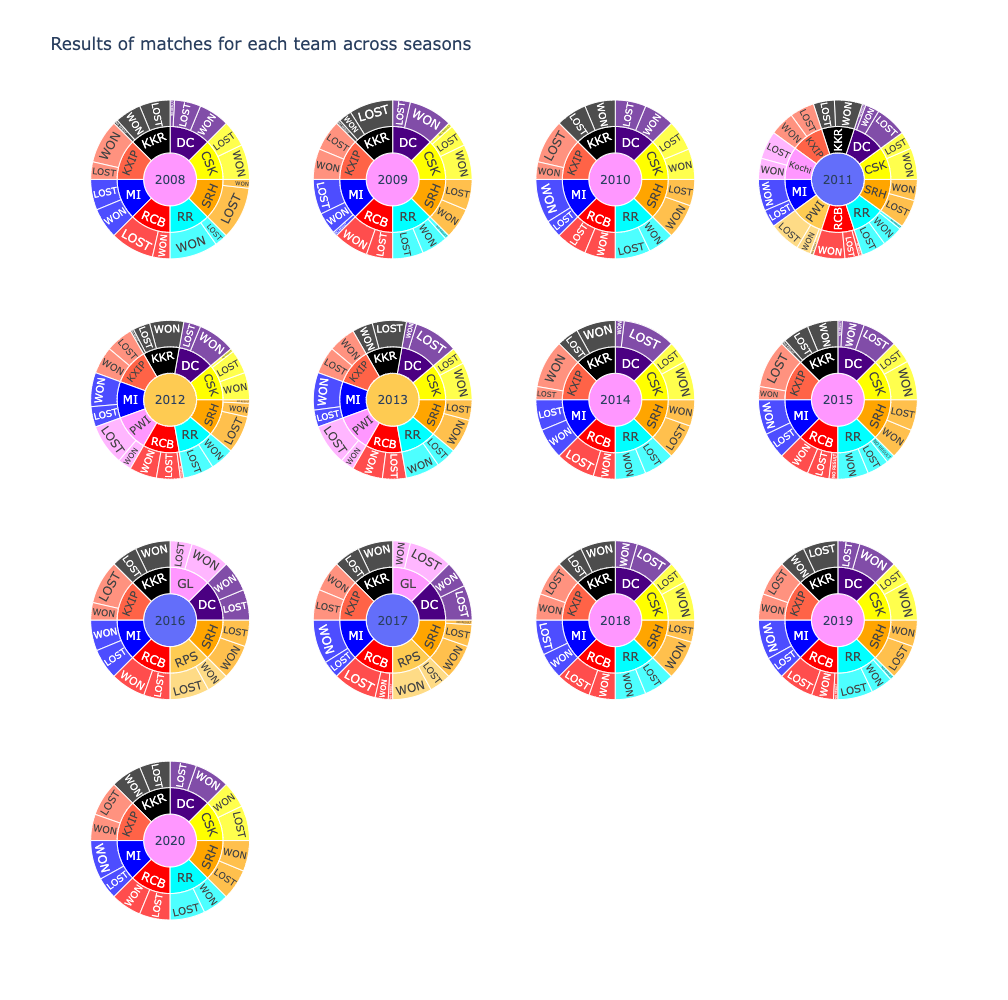

In [13]:
points_table_df = pd.read_csv("../data/points_table.csv")
updated_table_df = pd.DataFrame({'season' : [], 'short_name' : [], 'win_or_loss' : [], 'no_of_matches':[]})

c
    if data['noresult']:
        updated_table_df.loc[new_data_index] = [str(data['season']), data['short_name'], "NO RESULT", data['noresult']]
        new_data_index+=1
updated_table_df

season_matches = {}
for season, data in updated_table_df.groupby('season'):
    season_matches[season] = data

rows = 4
columns = 4
plot = []
fig = make_subplots(rows=rows, cols=columns, specs=[[{"type": "sunburst"}]*4]*4)
color_discrete_map={'CSK':'yellow', 'MI':'blue', 'KKR':'black', 'DC':'indigo', 'SRH':'orange', 'RCB':'red', 'RR':'cyan', 'KXIP':'tomato'}

for season in season_matches:
    plot.append(px.sunburst(season_matches[season], path=['season', 'short_name', 'win_or_loss'], values='no_of_matches', title=f"{season}",color='short_name', color_discrete_map=color_discrete_map))

index = 0
for each_row in range(rows):
    for each_column in range(columns):
        if len(plot)>index:
            fig.add_trace(plot[index].data[0], row=each_row+1, col=each_column+1)
            index+=1
fig.update_layout(height=1000, width=1000, title_text="Results of matches for each team across seasons")
fig.show()

### Highest Percentage of wins of a team

In [15]:
all_season_summary = pd.read_csv("../data/all_season_summary.csv")

teams_no_of_wins = {}
teams_no_of_wins = pd.DataFrame({'team' : [], 'total_matches_played' : [],"total_matches_won":[], 'total_matches_toss_won' : [], 'winner_when_toss_won':[], 'win_on_home_grounds':[], 'total_matches_played_in_home_ground':[]})
new_data_index = 0
for team in short_names.values():
    if team not in ["RPS", "GL", "PWI", "Kochi"]:
        total_matches_played = len(all_season_summary[(all_season_summary['home_team']==team) | (all_season_summary['away_team']==team)])
        total_matches_toss_won = len(all_season_summary[(all_season_summary['toss_won']==team)])
        winner_when_toss_won = len(all_season_summary[(all_season_summary['toss_won']==team) & (all_season_summary['winner']==team)])
        total_matches_won = len(all_season_summary[(all_season_summary['winner']==team)])
        total_matches_played_in_home_ground = len(all_season_summary[(all_season_summary['home_team']==team)])
        win_on_home_grounds = len(all_season_summary[(all_season_summary['home_team']==team) & (all_season_summary['winner']==team)])
        teams_no_of_wins.loc[new_data_index] = [team, total_matches_played,total_matches_won, total_matches_toss_won, winner_when_toss_won, win_on_home_grounds, total_matches_played_in_home_ground]
        new_data_index+=1

teams_no_of_wins

team  total_matches_played  total_matches_won  total_matches_toss_won  \
0    MI                 204.0              120.0                   106.0   
1    DC                 195.0               86.0                   100.0   
2   SRH                 201.0               95.0                   100.0   
3   RCB                 198.0               91.0                    88.0   
4   KKR                 196.0               99.0                    98.0   
5  KXIP                 190.0               88.0                    85.0   
6   CSK                 180.0              107.0                    97.0   
7    RR                 164.0               81.0                    87.0   
8   SRH                 201.0               95.0                   100.0   

   winner_when_toss_won  win_on_home_grounds  \
0                  61.0                 61.0   
1                  45.0                 49.0   
2                  48.0                 50.0   
3                  43.0                 49.0   
4                  55.0                 52.0   
5                  36.0                 47.0   
6                  61.0                 66.0   
7                  44.0                 46.0   
8                  48.0                 50.0   

   total_matches_played_in_home_ground  
0                                 99.0  
1                                100.0  
2                                101.0  
3                                103.0  
4                                 94.0  
5                                 93.0  
6                                101.0  
7                                 74.0  
8                                101.0

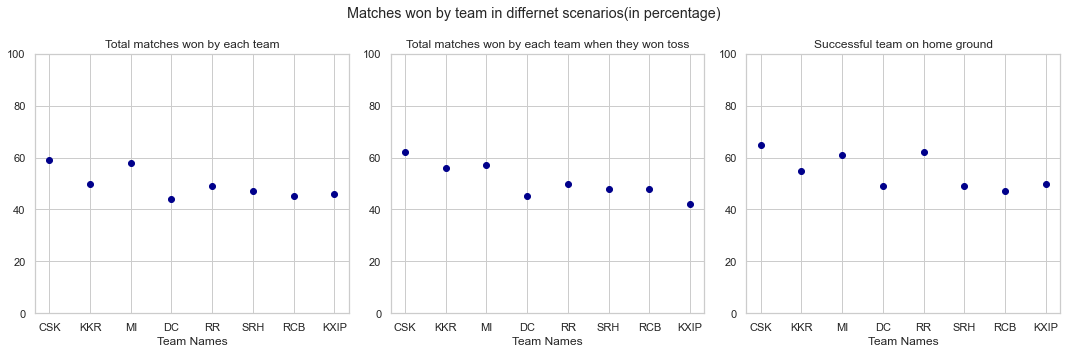

In [23]:


fig = plt.figure(figsize=(15, 5))
plt.suptitle("Matches won by team in differnet scenarios(in percentage)")
# plt.grid()
def plot_team_wins(x, y, position, title):
    fig.add_subplot(1,3,position)
    plt.scatter(x=x, y=y, c='DarkBlue')
    plt.ylim(0, 100)
    plt.title(title)
    plt.xlabel("Team Names")
    
## Total matches won by each team
team_names, win_percent = [], []
for name in set(short_names.values()):
    if name not in ["RPS", "GL", "PWI", "Kochi"]:
        team_names.append(name)
        total_matches_won = teams_no_of_wins['total_matches_won'][teams_no_of_wins['team'] == name].values[0]
        total_matches_played = teams_no_of_wins['total_matches_played'][teams_no_of_wins['team'] == name].values[0]
        win_percent.append(int((total_matches_won* 100)/total_matches_played))

plot_team_wins(team_names, win_percent, 1, 'Total matches won by each team')

## Total matches won by team when they won toss
team_names, win_percent = [], []
for name in set(short_names.values()):
    if name not in ["RPS", "GL", "PWI", "Kochi"]:
        team_names.append(name)
        winner_when_toss_won = teams_no_of_wins['winner_when_toss_won'][teams_no_of_wins['team'] == name].values[0]
        total_matches_toss_won = teams_no_of_wins['total_matches_toss_won'][teams_no_of_wins['team'] == name].values[0]
        win_percent.append(int((winner_when_toss_won* 100)/total_matches_toss_won))

plot_team_wins(team_names, win_percent, 2, 'Total matches won by each team when they won toss')


               
## Successful team on home ground 
team_names, win_percent = [], []
for name in set(short_names.values()):
    if name not in ["RPS", "GL", "PWI", "Kochi"]:
        team_names.append(name)
        total_matches_won = teams_no_of_wins['win_on_home_grounds'][teams_no_of_wins['team'] == name].values[0]
        total_matches_played = teams_no_of_wins['total_matches_played_in_home_ground'][teams_no_of_wins['team'] == name].values[0]
        win_percent.append(int((total_matches_won* 100)/total_matches_played))
        
plot_team_wins(team_names, win_percent, 3, 'Successful team on home ground')
plt.tight_layout()


## Runs Scored by all teams in all seasons  

In [61]:
season_summary = pd.read_csv("../data/all_season_summary.csv")
season_summary = season_summary.loc[~season_summary['home_team'].isin(["Kochi", "PWI", "RPS", "GL"])]
season_summary = season_summary.loc[~season_summary['away_team'].isin(["Kochi", "PWI", "RPS", "GL"])]

In [64]:
teams_runs = pd.DataFrame({'team' : [], 'runs' : []})

new_data_index = 0
for row, data in season_summary.iterrows():
    teams_runs.loc[new_data_index] = [str(data['home_team']), data['home_runs']]
    new_data_index+=1
    teams_runs.loc[new_data_index] = [str(data['away_team']), data['away_runs']]
    new_data_index+=1

[Text(0.5, 0, 'Team Name'), Text(0, 0.5, 'Runs')]

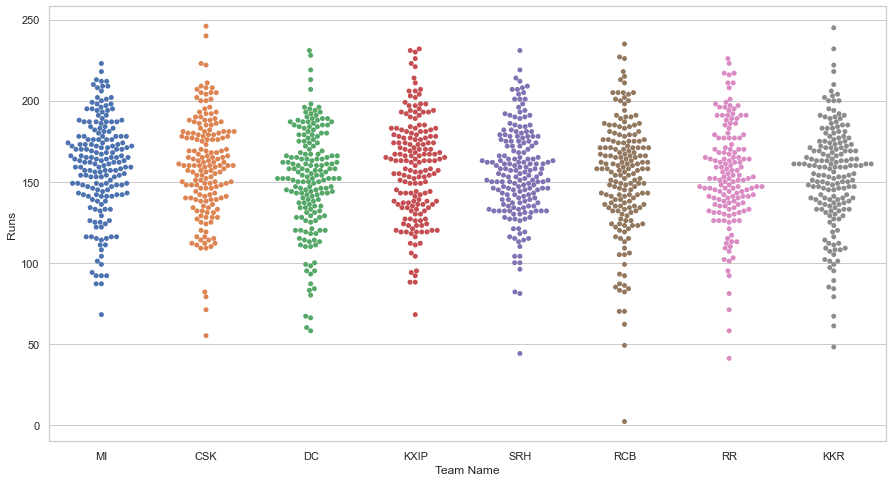

In [63]:
import seaborn as sns
plt.figure(figsize=(15,8))
sns.set_theme(style="whitegrid")
ax = sns.swarmplot(x= "team", y="runs", data=teams_runs)
ax.set(xlabel='Team Name', ylabel='Runs')